<a href="https://colab.research.google.com/github/ShishkinaMarina/LAB/blob/main/04_1_shishkina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name:

Email:




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [43]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [44]:
dose = [0,0,0,0,0,0,0,0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,5,5,5,5,5,5,5,5,]
food_cons = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3,73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1,38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]


Text(0.5, 1.0, 'Зависимость величины потребления пиши от введенной дозы амфетамина')

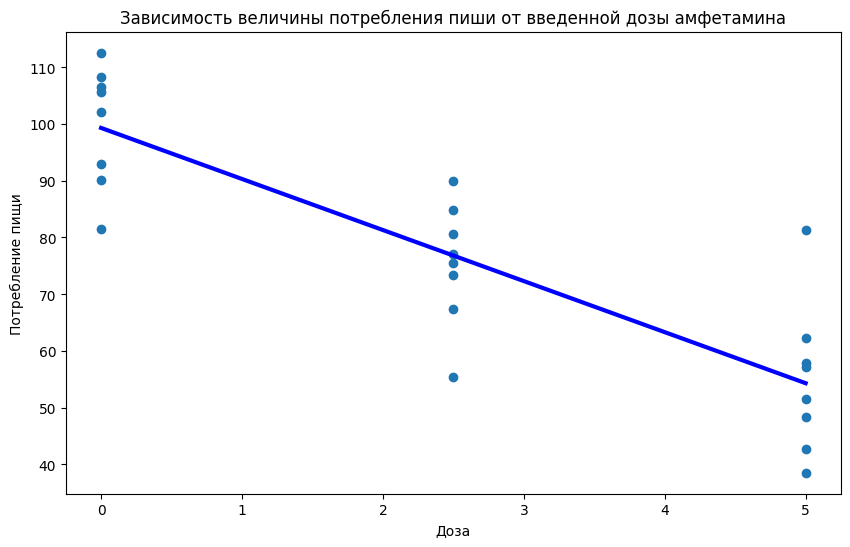

In [45]:
plt.scatter(dose, food_cons)
plt.plot(dose, linear_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Доза')
plt.ylabel('Потребление пищи')
plt.title("Зависимость величины потребления пиши от введенной дозы амфетамина")

**Ваш ответ:**

In [46]:
df = pd.DataFrame({'dose':[0,0,0,0,0,0,0,0, 2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5, 5,5,5,5,5,5,5,5],'food_cons':[112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3, 73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1, 38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]})
df.head()

,dose,food_cons
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6


In [47]:
linear = sm.ols(formula="food_cons ~ dose", data=df)
linear_ols = linear.fit()
print(linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              food_cons   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Sun, 26 May 2024   Prob (F-statistic):           7.27e-08
Time:                        08:33:24   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.0

In [ ]:
b0=99.3313
b1=-9.0075

Потребление пищи= 99.3313 + (-9.0075) * Доза.

Исходя из полученного уравнения линейной регрессии можно проследить обратную зависимость количества потребляемой пищи от дозы, полученной подопытым: чем больше доза, тем меньше количество потребляемой пищи


R^2 = 73,9% – это значит,что модель объясняет почти 74% изменчивости поведения
Значение p как для F-статистики, так и для коэффициента крайне мало, что указывает на сильную линейную связь и подтверждает значимость модели

Text(0.5, 1.0, 'Зависимость величины потребления пиши от введенной дозы амфетамина')

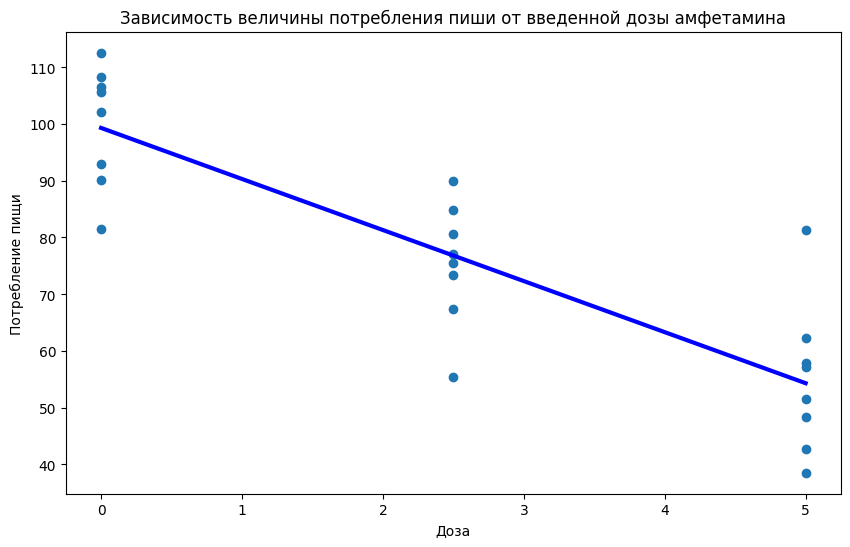

In [48]:
plt.scatter(dose, food_cons)
plt.plot(dose, linear_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Доза')
plt.ylabel('Потребление пищи')
plt.title("Зависимость величины потребления пиши от введенной дозы амфетамина")

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



In [49]:
residuals = linear_ols.resid
residuals

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
dtype: float64

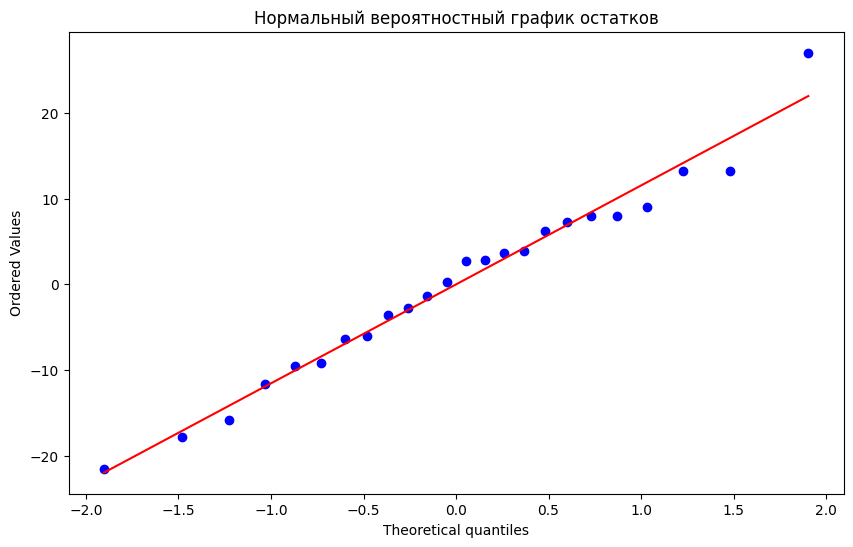

In [50]:
plt.figure(figsize=(10, 6))
sc.stats.probplot(residuals, plot=plt)
plt.title('Нормальный вероятностный график остатков')
plt.show()

так как большинство точек распределено вблизи прямой, распределение можно назвать нормальным